# Importing Packages & Setting Color Palette

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


%matplotlib inline
sns.set(rc={'figure.figsize':(8,6)})
sns.set_style("darkgrid", {"axes.facecolor": ".93"})

palette = [ '#00BFC4' ,'#F8766D', '#0085C7', '#000000', "#FFCE54", '#A1469E']
sns.set_palette(palette)

# Loading & Viewing the Data

In [3]:
# (r'C:\Users\Ferdous Hasan\Downloads\DATA DATA DATA (BA)\anime.csv')
anime = pd.read_csv(r'C:\Users\ASUS\Downloads\DATA DATA DATA (BA)\anime.csv')
rating = pd.read_csv(r'C:\Users\ASUS\Downloads\DATA DATA DATA (BA)\rating.csv')

In [4]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [5]:
print(anime.columns)

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')


In [6]:
print(rating.columns)

Index(['user_id', 'anime_id', 'rating'], dtype='object')


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


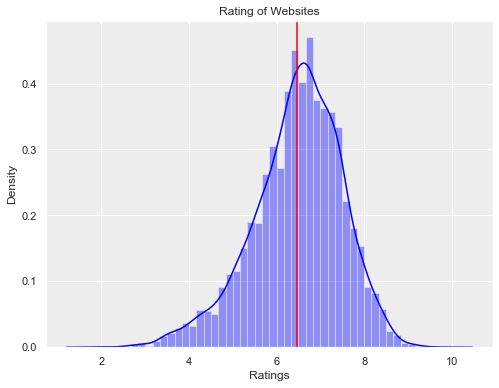

In [7]:
# make a side by side comparision of the rating of people

sns.distplot(anime.rating, color = 'blue').set(title= "Rating of Websites", xlabel= 'Ratings')

mean = anime['rating'].mean()

plt.axvline(mean, 0,1, color = 'red')

plt.savefig('E4', dpi = 300)

# Data Cleaning & Transformation

In [8]:
rating.rating.unique()

array([-1, 10,  8,  6,  9,  7,  3,  5,  4,  1,  2], dtype=int64)

In [9]:
rating['rating'].value_counts()

 8     1646019
-1     1476496
 7     1375287
 9     1254096
 10     955715
 6      637775
 5      282806
 4      104291
 3       41453
 2       23150
 1       16649
Name: rating, dtype: int64

In [10]:
df = pd.merge(anime,rating,on='anime_id',suffixes= ['', '_user'])
df = df.rename(columns={'name': 'anime_title', 'rating_user': 'user_rating'})
df.tail()

,anime_id,anime_title,genre,type,episodes,rating,members,user_id,user_rating
7813722,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,39532,-1
7813723,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,48766,-1
7813724,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,60365,4
7813725,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.46,142,27364,-1
7813726,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.46,142,48766,-1


In [11]:
df.shape[0]

7813727

# Real Shit Begins